<a href="https://colab.research.google.com/github/Stevenjr98/Image-classification-model-Cifar-10-/blob/main/enhanced_model_v1(batch_norm%2Bdynamic_lr).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# author: Stevenn
# date  : 2021-8-16
# model_v1
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import PIL
import numpy as np
import os
from tensorflow.keras import datasets, layers, models
import cv2 as cv
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

In [2]:
DataSet = tf.keras.datasets.cifar10

(train_image,train_label),(test_image,test_label) = DataSet.load_data()

class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
#train_image = train_image/255.0
#test_image = test_image/255.0

mean = np.mean(train_image,axis=(0,1,2,3))
std = np.std(train_image,axis=(0,1,2,3))
train_image = (train_image-mean)/(std+1e-7)
test_image = (test_image-mean)/(std+1e-7)

In [4]:
#rotation
data_augmentation = tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     layers.experimental.preprocessing.RandomRotation(0.2)
])

In [5]:
#resize
IMG_SIZE = 180

resize_and_scale = tf.keras.Sequential([
     layers.experimental.preprocessing.Resizing(IMG_SIZE,IMG_SIZE),
     layers.experimental.preprocessing.Rescaling(1./255.0)
])

In [6]:
#enhance
enhanced_img = tf.keras.Sequential([
     layers.experimental.preprocessing.Normalization(axis=-1,mean=None)
])

In [7]:
# lr for large epoch
epoch = 300
learning_rate = 0.001
def scheduler(epoch):
    if epoch < 100:
        return learning_rate * 0.1
    if epoch < 200:
        return learning_rate * 0.01
    return learning_rate * 0.05

In [8]:
# lr for small epoch
epoch = 300
learning_rate = 0.005
def scheduler(epoch):
    if epoch < 100:
        return learning_rate * 0.2
    if epoch < 300:
        return learning_rate * 0.02
    return learning_rate * 0.05

In [9]:
#formal_model_v1
model = tf.keras.Sequential([
   #resize_and_scale,
   data_augmentation,
   #enhanced_img,
   layers.Conv2D(64,(3,3),activation='ELU',input_shape=(32,32,3)),
   #layers.MaxPooling2D((2,2)),
   layers.Conv2D(64, (3, 3), activation='ELU'),
   layers.BatchNormalization(axis=1),
   #池化
   layers.MaxPooling2D((2,2)),
   #norm = tf.nn.lrn(poola,4,bias=1,alpha=1,beta=0.5,name = 'normal'),
   layers.Conv2D(128, (3, 3), activation='PReLU'),
   layers.BatchNormalization(axis=1),
   layers.MaxPooling2D((2,2)),
   layers.Conv2D(256, (3, 3), activation='relu'),
   layers.BatchNormalization(axis=1),
   layers.MaxPooling2D((2,2)),
   #layers.AveragePooling2D(2,2), 
   layers.Dropout(rate=0.5),
   layers.Flatten(),
   layers.Dense(1024, activation='relu'),
   layers.Dense(10,activation='softmax'),                       
])
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy'],
)

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
change_Lr = tf.keras.callbacks.LearningRateScheduler(scheduler)

cp=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)

In [ ]:
history = model.fit(train_image, train_label, epochs=500, batch_size = 32, 
                    validation_data=(test_image, test_label),
                    callbacks=[cp,change_Lr]
                    )

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1562/1563 [============================>.] - ETA: 0s - loss: 1.8377 - accuracy: 0.3386
Epoch 00001: saving model to training_1/cp.ckpt
1563/1563 [==============================] - 30s 8ms/step - loss: 1.8377 - accuracy: 0.3386 - val_loss: 1.6118 - val_accuracy: 0.4136 - lr: 0.0010
Epoch 2/500
1562/1563 [============================>.] - ETA: 0s - loss: 1.5267 - accuracy: 0.4481
Epoch 00002: saving model to training_1/cp.ckpt
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5268 - accuracy: 0.4481 - val_loss: 1.5309 - val_accuracy: 0.4475 - lr: 0.0010
Epoch 3/500
1558/1563 [============================>.] - ETA: 0s - loss: 1.3578 - accuracy: 0.5107
Epoch 00003: saving model to training_1/cp.ckpt
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3579 - accuracy: 0.5107 - val_loss: 1.2972 - val_accuracy: 0.5435 - lr: 0.0010
Epoch 4/500
1563/1563 [==============================] - ETA: 0s - loss: 1.2543 - accuracy: 0.5493
Epoch 00004: saving model to tr

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       112       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)      

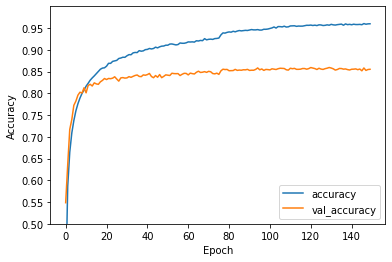

313/313 - 1s - loss: 0.6076 - accuracy: 0.8553


In [ ]:
#准确率视图
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
y_ticks = np.arange(0.5,1,0.05)
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_image,  test_label, verbose=2)

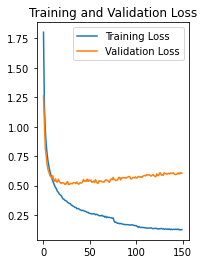

In [ ]:
#损失函数视图
epoch = 150
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#保存模型
#model.save('/saved_model/my_model')

In [ ]:
#second_model(loaded)
model.load_weights(checkpoint_path)

In [ ]:
#dynamic lr for model_v2
def lr_shedule(epoch):
  lrate = 0.001
  if epoch > 125:
    lrate = 0.0005
  if epoch > 200:
    lrate = 0.0003
  return lrate

In [ ]:
#model_v2
weight_decay = 1e-4

model = tf.keras.Sequential([
    data_augmentation,
    #enhanced_img,
    layers.Conv2D(32,(3,3),activation='ELU',padding = 'same',kernel_regularizer=keras.regularizers.l2(weight_decay),input_shape=train_image.shape[1:]),
    layers.BatchNormalization(axis=1),
    layers.Conv2D(32,(3,3),activation='ELU',padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)),
    layers.BatchNormalization(axis=1),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(rate=0.3),
    layers.Conv2D(64,(3,3),activation='ELU'),
    layers.BatchNormalization(axis=1),
    layers.Conv2D(64,(3,3),activation='ELU'),
    layers.BatchNormalization(axis=1),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(rate=0.4),
    layers.Conv2D(128,(3,3),activation='ELU'),
    layers.BatchNormalization(axis=1),
    layers.Conv2D(128,(3,3),activation='ELU'),
    layers.BatchNormalization(axis=1),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(rate=0.5),
    layers.Flatten(),
    #layers.Dense(1024, activation='relu'),
    layers.Dense(10,activation='softmax') 
])
model.compile(
    optimizer = tf.keras.optimizers.Adam(lr=0.001,decay=1e-6),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy'],
)
checkpoint_path = "training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
change_Lr = tf.keras.callbacks.LearningRateScheduler(lr_shedule)

cp=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#new data_augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(train_image)

In [ ]:
history = model.fit( #datagen.flow(train_image, train_label, batch_size=64),
                     train_image,train_label,batch_size = 64,
                     epochs=300,                                      
                     validation_data=(test_image, test_label),
                     callbacks=[change_Lr]
                    )

In [ ]:
model.summary()